In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nt
import neattext.functions as nfx

pd.reset_option("max_columns")

import warnings


In [2]:
dataset = pd.read_excel("Covid vaccine dataset.xlsx", sheet_name=3)

In [3]:
dataset.shape

(1685, 13)

In [4]:
dataset.head()

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0      Staff  19       2              1  White                        1.0   
1    Student  20       2              0  White                        2.0   
2    Student  19       1              0  White                        2.0   
3    Student  44       1              0  White                        NaN   
4      Staff  30       1              1  White                        NaN   

                             Reasons for Hesitation  Hesistation Status  \
0  Different things about my health in the long run                 NaN   
1                                               NaN                 3.0   
2                                               NaN                 3.0   
3                                               NaN                 3.0   
4                                               NaN                 0.0   

    Trust Level Safety Level    Confidence Level  \
0  Mostly trust  Mostly safe  Somewhat confident   
1  Mostly trust    Very safe      Very confident   
2  Mostly trust    Very safe      Very confident   
3           NaN          NaN                 NaN   
4           NaN          NaN                 NaN   

                                      Accessibility   \
0                               Making appointments    
1                                                NaN   
2  If we were allowed to be exempt from classes f...   
3                                                NaN   
4                                                NaN   

                                           Obstacles  
0      Me being an hour and a half away from campus   
1  inability to have transportation to vaccinatio...  
2                                        Scheduling   
3                                                NaN  
4                                                NaN

In [5]:
dataset.fillna(method='ffill', inplace=True)

In [7]:
dataset.isnull().sum()

Respondent                   0
Age                          0
Gender                       0
COVID-19 Jab?                0
Race                         0
Any reason for Hesitation    0
Reasons for Hesitation       0
Hesistation Status           1
Trust Level                  0
Safety Level                 0
Confidence Level             0
Accessibility                0
Obstacles                    0
dtype: int64

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Age  Race  Any reason for Hesitation  \
Respondent Gender COVID-19 Jab?                                         
Staff      1      0               30    30                         30   
                  1               75    75                         75   
           2      0               67    67                         67   
                  1              182   182                        182   
           3      0                1     1                          1   
                  1                7     7                          7   
           4      0                1     1                          1   
                  1                1     1                          1   
           7      1                1     1                          1   
Student    1      0              309   309                        309   
                  1               83    83                         83   
           2      0              692   692                        692   
                  1              182   182                        182   
           3      0               27    27                         27   
                  1                7     7                          7   
           4      0                3     3                          3   
                  1                1     1                          1   
           5      0                1     1                          1   
           6      0                5     5                          5   
                  1                4     4                          4   
           7      0                4     4                          4   
                  1                2     2                          2   

                                 Reasons for Hesitation  Hesistation Status  \
Respondent Gender COVID-19 Jab?                                               
Staff      1      0                                  30                  30   
                  1                                  75                  75   
           2      0                                  67                  67   
                  1                                 182                 181   
           3      0                                   1                   1   
                  1                                   7                   7   
           4      0                                   1                   1   
                  1                                   1                   1   
           7      1                                   1                   1   
Student    1      0                                 309                 309   
                  1                                  83                  83   
           2      0                                 692                 692   
                  1                                 182                 182   
           3      0                                  27                  27   
                  1                                   7                   7   
           4      0                                   3                   3   
                  1                                   1                   1   
           5      0                                   1                   1   
           6      0                                   5                   5   
                  1                                   4                   4   
           7      0                                   4                   4   
                  1                                   2                   2   

                                 Trust Level  Safety Level  Confidence Level  \
Respondent Gender COVID-19 Jab?                                                
Staff      1      0                       30            30                30   
                  1                       75            75                75   
           2      0                       67            67     

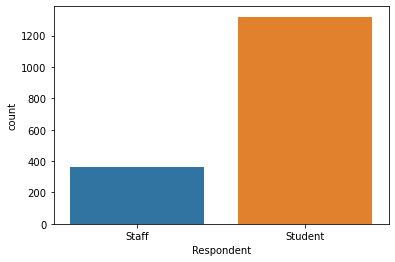

In [8]:
dataset.columns


sns.countplot(dataset['Respondent'])


gk = dataset.groupby('Respondent').count()


gk_covid = dataset.groupby(['COVID-19 Jab?', 'Respondent']).count()
gk_covid




gk_covid = dataset.groupby(['Respondent', 'Gender', 'COVID-19 Jab?']).count()
gk_covid




In [9]:


dataset.isnull().sum()





Respondent                   0
Age                          0
Gender                       0
COVID-19 Jab?                0
Race                         0
Any reason for Hesitation    0
Reasons for Hesitation       0
Hesistation Status           1
Trust Level                  0
Safety Level                 0
Confidence Level             0
Accessibility                0
Obstacles                    0
dtype: int64

In [10]:

import plotly.express as px
import plotly.offline as pyo


# In[24]:


fig = px.scatter(dataset, y="Age", color='Gender')
fig.show()


In [11]:
Hesistation_freq = dataset[["Reasons for Hesitation", "COVID-19 Jab?", "Respondent"]]
Hesistation_freq.groupby(['COVID-19 Jab?', 'Respondent']).count()

Reasons for Hesitation
COVID-19 Jab? Respondent                        
0             Staff                           99
              Student                       1041
1             Staff                          266
              Student                        279

## Text cleaning


In [12]:

#Remove Noise

dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_currency_symbols)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_stopwords)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_numbers)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_currencies)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_shortwords)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_special_characters)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_punctuations)

dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_currency_symbols)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_stopwords)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_numbers)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_currencies)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_shortwords)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_special_characters)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_punctuations)

dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_currency_symbols)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_stopwords)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_numbers)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_currencies)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_shortwords)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_special_characters)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_punctuations)



#converting to numbers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

dataset["Accessibility_n"] = lb.fit_transform(dataset["Accessibility "])
dataset["Obstacles_n"] = lb.fit_transform(dataset["Obstacles"])
dataset["Reasons for Hesitation_n"] = lb.fit_transform(dataset["Reasons for Hesitation"])
dataset["Respondent_n"] = lb.fit_transform(dataset["Respondent"])
dataset["Race_n"] = lb.fit_transform(dataset["Race"])
dataset["Confidence Level_n"] = lb.fit_transform(dataset["Confidence Level"])
dataset["Trust Level_n"] = lb.fit_transform(dataset["Trust Level"])
dataset["Safety Level_n"] = lb.fit_transform(dataset["Safety Level"])


#clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = dataset[['Reasons for Hesitation_n', 'Obstacles_n', 'Accessibility_n']]
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
dataset['Cluster'] = kmeansmodel.fit_predict(X)




In [13]:
dataset["Accessibility "].unique()

array(['Making appointments', 'allowed exempt classes',
       'streamlined clinic makes getting vaccine simple situation',
       'Email updates eligibility', 'distributed hours early later',
       'Good Info',
       'harmful effects infertility perfectly healthy want conditions arise vaccine that year',
       'location close campus possible', 'places vaccine',
       'tested housing', 'sure', 'Invite email', 'Week school',
       'Appt times receive', 'walkability', 'appointment times',
       'Close home', 'location', 'parking', 'Close distance',
       'Nothing needed order receive vaccine', '', 'plan getting',
       'campus site', 'information safety vaccine', 'want date vaccine',
       'proximity campus', 'Appalachian state campus Boone',
       'available campus', 'vaccine given campus',
       'told covid vaccine takes location', 'transportation',
       'medical setting receive', 'available times long wait times',
       'Flexible time slots', 'Flexible Scheduling', 'free

In [77]:
dataset["Reasons for Hesitation"].unique()

array(['Different things health long', 'Possibly infertility',
       'Different effects', 'hours following', 'Aborted babies',
       'women infertile', 'Nothing That thing years',
       'sideaffects possible hazards', 'vaccine approved unknown effects',
       'Bill Gates planned eugenics population control', 'Infertility',
       'Anaphylactic shock', 'Possible effects Pregnancy',
       'Temporary effects', 'rumors infertility sure long term effects',
       'They worried effects don believe Covid dangerous saying',
       'People reacting negatively vaccine fevers headaches reaction shot year',
       'Conspiracy theories',
       'seen misinformation social media that personally disregarded vaccines alter recipients contain microchips',
       'fact don know long term effects vaccine opinion came quickly came vaccine Covid year took years years find vaccine',
       'Fertility reasons',
       'vaccine effective Moderna Pfizer close contact students want effective vaccine availa

SENTIMENT ANALYSIS

.Polarity and Subjectivity


In [14]:
from textblob import TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    subj = blob.sentiment.subjectivity
    if pol < 0:
        result = "negative"
    elif pol == 0:
        result = "neutral"
    else:
        result = "positive"
    return result
    #return  {"pol": {pol}, "subj": subj, "label": result}

In [15]:
def pol(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    return pol

In [16]:
def subj(text):
    blob = TextBlob(text)
    subj = blob.sentiment.subjectivity
    return subj

In [17]:
dataset["Reasons for Hesitation_pol"] =dataset["Reasons for Hesitation"].apply(pol)
dataset["Reasons for Hesitation_subj"] =dataset["Reasons for Hesitation"].apply(subj)

In [18]:
dataset["Reasons for Hesitation_sent"] =dataset["Reasons for Hesitation"].apply(sentiment_analysis)
dataset["Obstacles_sent"] = dataset["Obstacles"].apply(sentiment_analysis)
dataset["Accessibility_sent"] = dataset["Accessibility "].apply(sentiment_analysis)


In [19]:
dataset["Reasons for Hesitation_pol"]

0      -0.025000
1      -0.025000
2      -0.025000
3      -0.025000
4      -0.025000
          ...   
1680   -0.083333
1681   -0.083333
1682    0.000000
1683    0.000000
1684    0.000000
Name: Reasons for Hesitation_pol, Length: 1685, dtype: float64

In [20]:
dataset["Reasons for Hesitation_sent"]

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
1680    negative
1681    negative
1682     neutral
1683     neutral
1684     neutral
Name: Reasons for Hesitation_sent, Length: 1685, dtype: object

In [21]:
dataset["Reasons for Hesitation_sent"].value_counts()

neutral     912
negative    473
positive    300
Name: Reasons for Hesitation_sent, dtype: int64

In [22]:
dataset["Obstacles_sent"].value_counts()

neutral     1075
negative     342
positive     268
Name: Obstacles_sent, dtype: int64

In [23]:
dataset["Accessibility_sent"].value_counts()

neutral     1139
positive     465
negative      81
Name: Accessibility_sent, dtype: int64

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Reasons for Hesitation_sent', ylabel='count'>

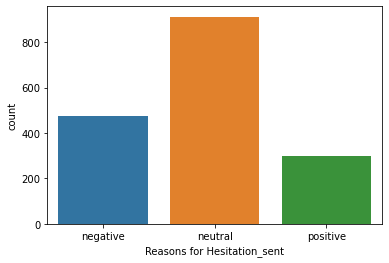

In [24]:
sns.countplot(dataset["Reasons for Hesitation_sent"])

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Obstacles_sent', ylabel='count'>

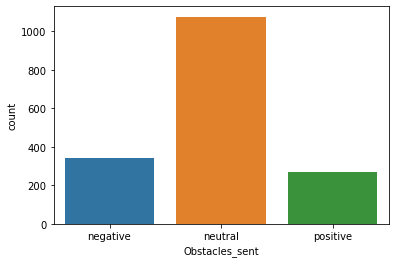

In [25]:
sns.countplot(dataset["Obstacles_sent"])

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Accessibility_sent', ylabel='count'>

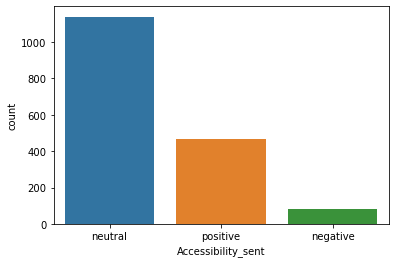

In [26]:
sns.countplot(dataset["Accessibility_sent"])

## Tokenization

In [27]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
dataset["Obstacles_tk"] = [word_tokenize(i) for i in dataset["Obstacles"]]
dataset["Reasons for Hesitation_tk"] = [word_tokenize(i) for i in dataset["Reasons for Hesitation"]]
dataset["Accessibility_tk "] = [word_tokenize(i) for i in dataset["Accessibility "]]

In [29]:
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [30]:
from collections import Counter


# In[ ]:


def comm(d,n=30):
    doc = Counter(d)
    common = doc.most_common(n)

    return common


# In[ ]:


comm(dataset['Reasons for Hesitation'])







[('effects', 52),
 ('effects vaccine', 30),
 ('Nothing That thing years', 24),
 ('Heard kill', 24),
 ('Different effacies effects general malaise', 20),
 ('People dying', 18),
 ('allergic reaction', 18),
 ('Different things health long', 17),
 ('Possibility affect reproductive system', 17),
 ('affects', 16),
 ('General disruption everyday life days Johnson Johnson', 16),
 ('Infertility', 15),
 ('Media portrayals possible future problems vaccine similar arguments', 14),
 ('Infertility issues', 14),
 ('side effects efficacy vaccine', 13),
 ('Severe effects', 13),
 ('Fear effects fear test subjects', 12),
 ('Fertility Issues', 12),
 ('testing long term effects', 12),
 ('News article individual died vaccine', 12),
 ('infertility', 11),
 ('people mentioned strong reaction received vaccine', 11),
 ('People getting fevers cold chills coughing understand purpose making sick order sick virus',
  10),
 ('Weird symptoms', 10),
 ('heard short term effect scared vaccine came fast don know long term

In [31]:
comm(dataset['Obstacles'])

[('', 159),
 ('VAERS website mRNA vaccines leading past finally clinical trial vaccine people actually received vaccine trial',
  88),
 ('Transportation', 22),
 ('knowing long term effects', 15),
 ('School', 15),
 ('money wise people want', 14),
 ('communication available', 13),
 ('sure', 12),
 ('away', 12),
 ('think would', 12),
 ('want', 12),
 ('advertising', 12),
 ('Scheduling', 11),
 ('Nothing', 11),
 ('Location', 11),
 ('Strict times high list access vaccine', 11),
 ('Proof effects internal organs', 10),
 ('Distance', 9),
 ('wont vaccine', 9),
 ('campus', 8),
 ('Time', 8),
 ('location', 8),
 ('transportation', 8),
 ('Location central vaccination times cater individual schedules', 8),
 ('lack transportation conflicting schedule primary worries', 8),
 ('vaccine', 7),
 ('Availability', 7),
 ('school work', 7),
 ('minute emergencies', 7),
 ('personal time possible affects', 7)]

In [32]:

comm(dataset['Accessibility '])


[('', 92),
 ('actual clinical trial rushed', 88),
 ('sure', 25),
 ('campus', 17),
 ('Location', 14),
 ('noting', 14),
 ('Learning information effects people', 13),
 ('notification when', 13),
 ('Available test sites', 13),
 ('advertising', 12),
 ('Easy access', 11),
 ('Variable flexible times safe conditions', 11),
 ('research', 10),
 ('getting vaccine', 10),
 ('provden affects internal organs time', 10),
 ('information', 9),
 ('know', 9),
 ('flexible schedule', 9),
 ('free', 8),
 ('vaccination site campus possibly drive through', 8),
 ('multiple flexible dates times available appointments', 8),
 ('near', 8),
 ('open schedule ease transportation', 8),
 ('Transportation', 7),
 ('Availability', 7),
 ('Unsure', 7),
 ('don know', 7),
 ('Scheduling', 7),
 ('benefits assurances names school receiving', 7),
 ('vaccinated outcomes', 7)]

In [33]:
dataset

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0         Staff  19       2              1  White                        1.0   
1       Student  20       2              0  White                        2.0   
2       Student  19       1              0  White                        2.0   
3       Student  44       1              0  White                        2.0   
4         Staff  30       1              1  White                        2.0   
...         ...  ..     ...            ...    ...                        ...   
1680    Student  20       1              0  White                        1.0   
1681    Student  28       1              1  White                        1.0   
1682      Staff  28       1              1  White                        1.0   
1683    Student  19       1              0  White                        2.0   
1684    Student  19       1              0  White                        2.0   

                                Reasons for Hesitation  Hesistation Status  \
0                         Different things health long                 NaN   
1                         Different things health long                 3.0   
2                         Different things health long                 3.0   
3                         Different things health long                 3.0   
4                         Different things health long                 0.0   
...                                                ...                 ...   
1680  relative newness vaccine given slight hesitation                 3.0   
1681  relative newness vaccine given slight hesitation                 0.0   
1682                      Heard faces gotten paralyzed                 0.0   
1683                      Heard faces gotten paralyzed                 3.0   
1684                      Heard faces gotten paralyzed                 3.0   

              Trust Level     Safety Level  ... Safety Level_n Cluster  \
0            Mostly trust      Mostly safe  ...              0       4   
1            Mostly trust        Very safe  ...              3       4   
2            Mostly trust        Very safe  ...              3       0   
3            Mostly trust        Very safe  ...              3       0   
4            Mostly trust        Very safe  ...              3       0   
...                   ...              ...  ...            ...     ...   
1680         Mostly trust      Mostly safe  ...              0       4   
1681         Mostly trust      Mostly safe  ...              0       4   
1682  Do not trust at all  Not safe at all  ...              1       4   
1683         Mostly trust      Mostly safe  ...              0       4   
1684         Mostly trust      Mostly safe  ...              0       4   

     Reasons for Hesitation_pol  Reasons for Hesitation_subj  \
0                     -0.025000                     0.500000   
1                     -0.025000                     0.500000   
2                     -0.025000                     0.500000   
3                     -0.025000                     0.500000   
4                     -0.025000                     0.500000   
...                         ...                          ...   
1680                  -0.083333                     0.083333   
1681                  -0.083333                     0.083333   
1682                   0.000000                     0.000000   
1683                   0.000000                     0.000000   
1684                   0.000000                     0.000000   

      Reasons for Hesitation_sent  Obstacles_sent  Accessibility_sent  \
0                        negative        negative             neutral   
1                        negative         neutral             neutral   
2                        negative         neutral             neutral   
3                        negative         neutral             neutral   
4                        negative         neutral             neutral   
...        

In [34]:
dataset['Cluster']

0       4
1       4
2       0
3       0
4       0
       ..
1680    4
1681    4
1682    4
1683    4
1684    4
Name: Cluster, Length: 1685, dtype: int32

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



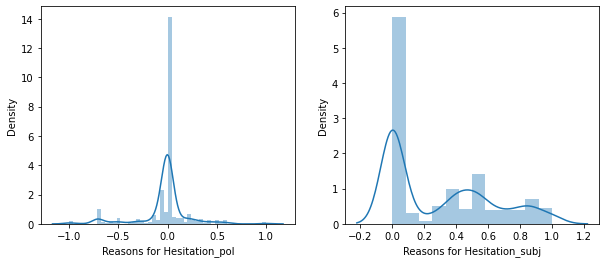

In [35]:
plt.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,2,1)
sns.distplot(dataset["Reasons for Hesitation_pol"])

plt.subplot(1,2,2)
sns.distplot(dataset["Reasons for Hesitation_subj"])
plt.show()

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



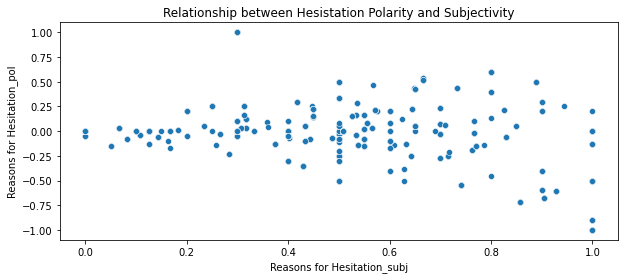

In [36]:
plt.title("Relationship between Hesistation Polarity and Subjectivity")
sns.scatterplot(dataset["Reasons for Hesitation_subj"], dataset["Reasons for Hesitation_pol"])
plt.show()

In [37]:
#!pip install wordcloud

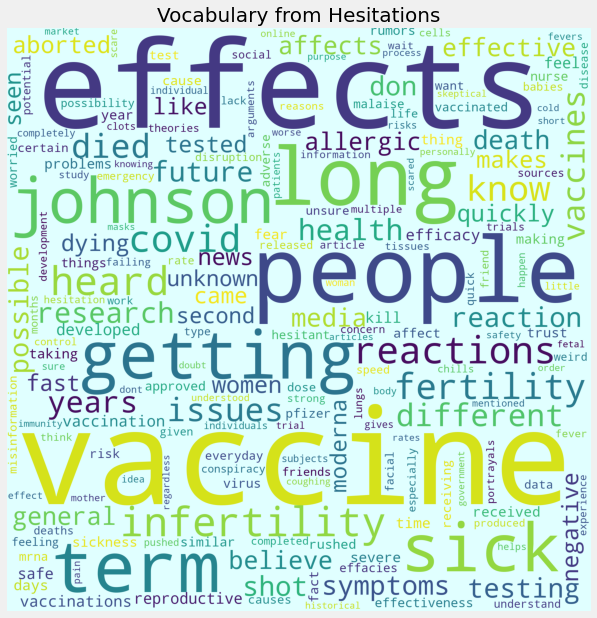

In [40]:
# lets plot the Wordscloud
from sklearn.feature_extraction.text import CountVectorizer


# for Wordscloud
from wordcloud import WordCloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset['Reasons for Hesitation'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Hesitations", fontsize = 20)
plt.show()

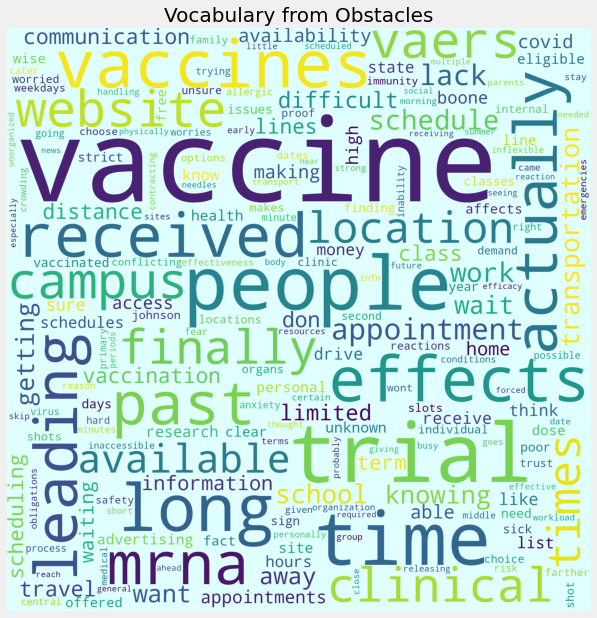

In [41]:
# lets plot the Wordscloud



cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.Obstacles)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Obstacles", fontsize = 20)
plt.show()

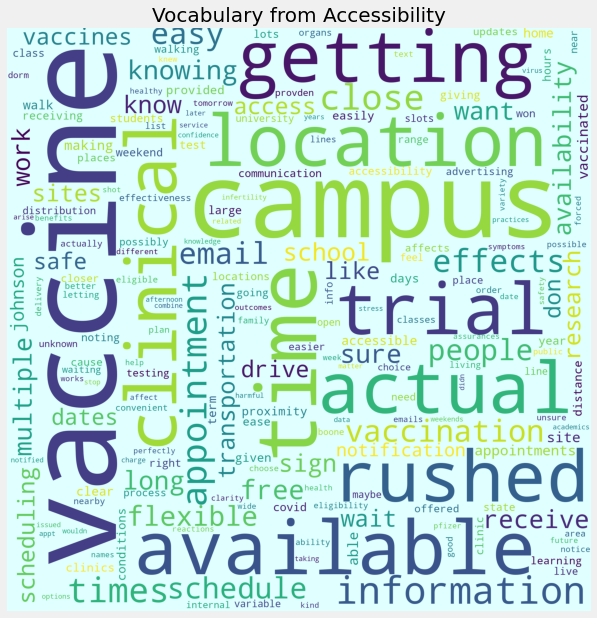

In [42]:
# lets plot the Wordscloud



cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset['Accessibility '])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Accessibility", fontsize = 20)
plt.show()

In [43]:
Cat_dataset = pd.read_excel("Categories.xlsx")

In [44]:
Cat_dataset

OBSTACLES OBSTACLES CATEGORIES  \
0    ('VAERS website mRNA vaccines leading past fi...             Concerns   
1                             ('Transportation', 22),        Accessibility   
2                  ('knowing long term effects', 15),         Organisation   
3                                     ('School', 15),                  Pro   
4                     ('money wise people want', 14),             Concerns   
5                    ('communication available', 13),        Communication   
6                                       ('sure', 12),                  Pro   
7                                       ('away', 12),                  Pro   
8                                ('think would', 12),        Communication   
9                                       ('want', 12),         Organisation   
10                               ('advertising', 12),        Accessibility   
11                                ('Scheduling', 11),                  Pro   
12                                   ('Nothing', 11),        Accessibility   
13                                  ('Location', 11),             Concerns   
14     ('Strict times high list access vaccine', 11),                 Anti   
15             ('Proof effects internal organs', 10),        Accessibility   
16                                   ('Distance', 9),        Accessibility   
17                               ('wont vaccine', 9),         Organisation   
18                                     ('campus', 8),        Accessibility   
19                                       ('Time', 8),        Accessibility   
20                                   ('location', 8),         Organisation   
21                             ('transportation', 8),        Accessibility   
22   ('Location central vaccination times cater in...         Organisation   
23   ('lack transportation conflicting schedule pr...             Concerns   
24                                    ('vaccine', 7),        Accessibility   
25                               ('Availability', 7),        Accessibility   
26                                ('school work', 7),             Concerns   
27                         ('minute emergencies', 7),           Incentives   
28             ('personal time possible affects', 7)]        Accessibility   
29                                                NaN                  NaN   

                                            HESITANCY HESITANCY CATGORIES  \
0                                   [('effects', 52),        Side effects   
1                            ('effects vaccine', 30),        Side effects   
2                   ('Nothing That thing years', 24),       Effectiveness   
3                                 ('Heard kill', 24),               Death   
4    ('Different effacies effects general malaise'...       Effectiveness   
5                               ('People dying', 18),               Death   
6                          ('allergic reaction', 18),        Side effects   
7               ('Different things health long', 17),        Side effects   
8     ('Possibility affect reproductive system', 17),           Fertility   
9                                    ('affects', 16),        Side effects   
10   ('General disruption everyday life days Johns...        Organisation   
11                               ('Infertility', 15),           Fertility   
12   ('Media portrayals possible future problems v...       Communication   
13                        ('Infertility issues', 14),           Fertility   
14             ('side effects efficacy vaccine', 13),        Side effects   
15                            ('Severe effects', 13),        Side effects   
16           ('Fear effects fear test subjects', 12),        Side effects   
17                          ('Fertility Issues', 12),           Fertility   
18                 ('testing long term effects', 12),        Side effects   
19      ('News article individual died vaccine', 12),       Communication   
20      

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



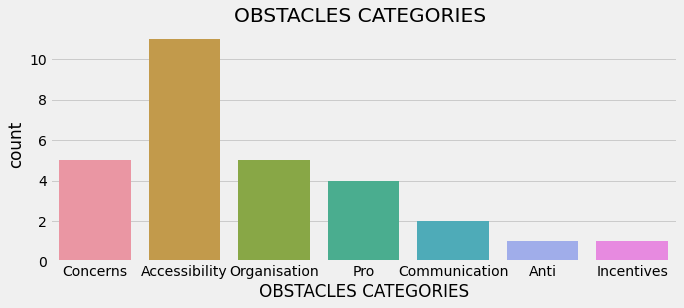

In [45]:
plt.title("OBSTACLES CATEGORIES ")
sns.countplot(Cat_dataset['OBSTACLES CATEGORIES'])
plt.show()

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



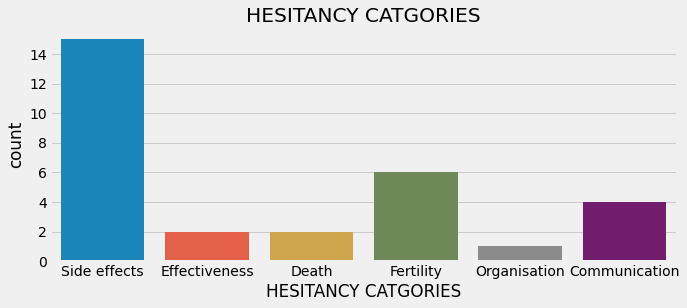

In [46]:
plt.title("HESITANCY CATGORIES")
sns.countplot(Cat_dataset['HESITANCY CATGORIES'])
plt.show()

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



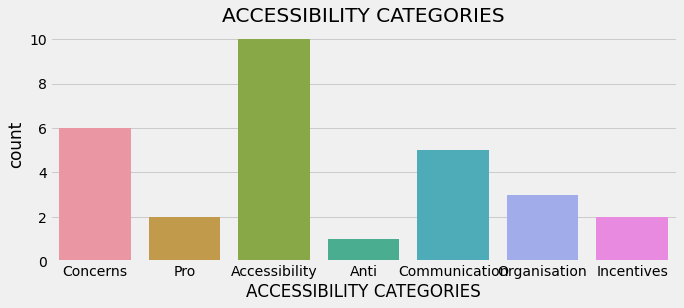

In [47]:
plt.title("ACCESSIBILITY CATEGORIES")
sns.countplot(Cat_dataset['ACCESSIBILITY CATEGORIES'])
plt.show()

In [48]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
dataset.shape

(1685, 30)

In [50]:
## Cleaning the Data

hesistation = []

for i in range(0, 1685):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Reasons for Hesitation'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    hesistation.append(review)

In [51]:
## Cleaning the Data

obstacles = []

for i in range(0, 1685):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Obstacles'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    obstacles.append(review)


In [52]:
obstacles

['hour half away campu',
 'inabl transport vaccin site',
 'schedul',
 'schedul',
 'schedul',
 'schedul',
 'person phobia needl biggest hurdl',
 'person phobia needl biggest hurdl',
 'lack commun appoint avail',
 'lack commun appoint avail',
 'lack commun appoint avail',
 'lack commun appoint avail',
 'lack commun appoint avail',
 'hour limit',
 'hour limit',
 'tight time slot',
 'tight time slot',
 'money research prove safeti effect',
 'money research prove safeti effect',
 'money research prove safeti effect',
 'avail appet',
 'avail appet',
 'difficult access',
 'physic inaccess',
 'physic inaccess',
 'physic inaccess',
 'physic inaccess',
 'physic inaccess',
 'practic meet sick',
 'practic meet sick',
 'practic meet sick',
 'practic meet sick',
 'sure',
 '',
 'week school',
 'boon doabl prefer',
 'boon doabl prefer',
 'locat outsid boon',
 'locat outsid boon',
 'schedul transport',
 'farther home',
 'farther home',
 'farther home',
 'farther home',
 'farther home',
 'farther home',

In [53]:
dataset

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0         Staff  19       2              1  White                        1.0   
1       Student  20       2              0  White                        2.0   
2       Student  19       1              0  White                        2.0   
3       Student  44       1              0  White                        2.0   
4         Staff  30       1              1  White                        2.0   
...         ...  ..     ...            ...    ...                        ...   
1680    Student  20       1              0  White                        1.0   
1681    Student  28       1              1  White                        1.0   
1682      Staff  28       1              1  White                        1.0   
1683    Student  19       1              0  White                        2.0   
1684    Student  19       1              0  White                        2.0   

                                Reasons for Hesitation  Hesistation Status  \
0                         Different things health long                 NaN   
1                         Different things health long                 3.0   
2                         Different things health long                 3.0   
3                         Different things health long                 3.0   
4                         Different things health long                 0.0   
...                                                ...                 ...   
1680  relative newness vaccine given slight hesitation                 3.0   
1681  relative newness vaccine given slight hesitation                 0.0   
1682                      Heard faces gotten paralyzed                 0.0   
1683                      Heard faces gotten paralyzed                 3.0   
1684                      Heard faces gotten paralyzed                 3.0   

              Trust Level     Safety Level  ... Safety Level_n Cluster  \
0            Mostly trust      Mostly safe  ...              0       4   
1            Mostly trust        Very safe  ...              3       4   
2            Mostly trust        Very safe  ...              3       0   
3            Mostly trust        Very safe  ...              3       0   
4            Mostly trust        Very safe  ...              3       0   
...                   ...              ...  ...            ...     ...   
1680         Mostly trust      Mostly safe  ...              0       4   
1681         Mostly trust      Mostly safe  ...              0       4   
1682  Do not trust at all  Not safe at all  ...              1       4   
1683         Mostly trust      Mostly safe  ...              0       4   
1684         Mostly trust      Mostly safe  ...              0       4   

     Reasons for Hesitation_pol  Reasons for Hesitation_subj  \
0                     -0.025000                     0.500000   
1                     -0.025000                     0.500000   
2                     -0.025000                     0.500000   
3                     -0.025000                     0.500000   
4                     -0.025000                     0.500000   
...                         ...                          ...   
1680                  -0.083333                     0.083333   
1681                  -0.083333                     0.083333   
1682                   0.000000                     0.000000   
1683                   0.000000                     0.000000   
1684                   0.000000                     0.000000   

      Reasons for Hesitation_sent  Obstacles_sent  Accessibility_sent  \
0                        negative        negative             neutral   
1                        negative         neutral             neutral   
2                        negative         neutral             neutral   
3                        negative         neutral             neutral   
4                        negative         neutral             neutral   
...        

In [54]:
dataset['Obstacles']

0                            hour half away campus
1       inability transportation vaccination sites
2                                       Scheduling
3                                       Scheduling
4                                       Scheduling
                           ...                    
1680                       vaccines offered campus
1681                       vaccines offered campus
1682                       vaccines offered campus
1683                       vaccines offered campus
1684                       vaccines offered campus
Name: Obstacles, Length: 1685, dtype: object

In [55]:
from collections import Counter


# In[ ]:


def comm(d,n=30):
    doc = Counter(d)
    common = doc.most_common(n)

    return common


# In[ ]:


comm(dataset['Reasons for Hesitation'])

[('effects', 52),
 ('effects vaccine', 30),
 ('Nothing That thing years', 24),
 ('Heard kill', 24),
 ('Different effacies effects general malaise', 20),
 ('People dying', 18),
 ('allergic reaction', 18),
 ('Different things health long', 17),
 ('Possibility affect reproductive system', 17),
 ('affects', 16),
 ('General disruption everyday life days Johnson Johnson', 16),
 ('Infertility', 15),
 ('Media portrayals possible future problems vaccine similar arguments', 14),
 ('Infertility issues', 14),
 ('side effects efficacy vaccine', 13),
 ('Severe effects', 13),
 ('Fear effects fear test subjects', 12),
 ('Fertility Issues', 12),
 ('testing long term effects', 12),
 ('News article individual died vaccine', 12),
 ('infertility', 11),
 ('people mentioned strong reaction received vaccine', 11),
 ('People getting fevers cold chills coughing understand purpose making sick order sick virus',
  10),
 ('Weird symptoms', 10),
 ('heard short term effect scared vaccine came fast don know long term

In [56]:
# Extracting the Features using the Tfidf Vectorizer for obstacles

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(obstacles).toarray()
y = dataset.iloc[:, 3].values

print(x.shape)
print(y.shape)

(1685, 634)
(1685,)


In [57]:
dataset

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0         Staff  19       2              1  White                        1.0   
1       Student  20       2              0  White                        2.0   
2       Student  19       1              0  White                        2.0   
3       Student  44       1              0  White                        2.0   
4         Staff  30       1              1  White                        2.0   
...         ...  ..     ...            ...    ...                        ...   
1680    Student  20       1              0  White                        1.0   
1681    Student  28       1              1  White                        1.0   
1682      Staff  28       1              1  White                        1.0   
1683    Student  19       1              0  White                        2.0   
1684    Student  19       1              0  White                        2.0   

                                Reasons for Hesitation  Hesistation Status  \
0                         Different things health long                 NaN   
1                         Different things health long                 3.0   
2                         Different things health long                 3.0   
3                         Different things health long                 3.0   
4                         Different things health long                 0.0   
...                                                ...                 ...   
1680  relative newness vaccine given slight hesitation                 3.0   
1681  relative newness vaccine given slight hesitation                 0.0   
1682                      Heard faces gotten paralyzed                 0.0   
1683                      Heard faces gotten paralyzed                 3.0   
1684                      Heard faces gotten paralyzed                 3.0   

              Trust Level     Safety Level  ... Safety Level_n Cluster  \
0            Mostly trust      Mostly safe  ...              0       4   
1            Mostly trust        Very safe  ...              3       4   
2            Mostly trust        Very safe  ...              3       0   
3            Mostly trust        Very safe  ...              3       0   
4            Mostly trust        Very safe  ...              3       0   
...                   ...              ...  ...            ...     ...   
1680         Mostly trust      Mostly safe  ...              0       4   
1681         Mostly trust      Mostly safe  ...              0       4   
1682  Do not trust at all  Not safe at all  ...              1       4   
1683         Mostly trust      Mostly safe  ...              0       4   
1684         Mostly trust      Mostly safe  ...              0       4   

     Reasons for Hesitation_pol  Reasons for Hesitation_subj  \
0                     -0.025000                     0.500000   
1                     -0.025000                     0.500000   
2                     -0.025000                     0.500000   
3                     -0.025000                     0.500000   
4                     -0.025000                     0.500000   
...                         ...                          ...   
1680                  -0.083333                     0.083333   
1681                  -0.083333                     0.083333   
1682                   0.000000                     0.000000   
1683                   0.000000                     0.000000   
1684                   0.000000                     0.000000   

      Reasons for Hesitation_sent  Obstacles_sent  Accessibility_sent  \
0                        negative        negative             neutral   
1                        negative         neutral             neutral   
2                        negative         neutral             neutral   
3                        negative         neutral             neutral   
4                        negative         neutral             neutral   
...        

In [58]:
def polarity(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    if pol < 0:
        result = "negative"
    elif pol == 0:
        result = "neutral"
    else:
        result = "positive"
    return result

In [59]:
dataset['pol']  = dataset["Reasons for Hesitation"].apply(polarity)

In [60]:
dataset['pol']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
1680    negative
1681    negative
1682     neutral
1683     neutral
1684     neutral
Name: pol, Length: 1685, dtype: object

In [61]:
#Negativity and Positivty of Polarity

df = dataset[dataset['pol'] != 'neutral']

In [62]:
df

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0         Staff  19       2              1  White                        1.0   
1       Student  20       2              0  White                        2.0   
2       Student  19       1              0  White                        2.0   
3       Student  44       1              0  White                        2.0   
4         Staff  30       1              1  White                        2.0   
...         ...  ..     ...            ...    ...                        ...   
1676    Student  20       1              0  White                        2.0   
1677    Student  18       1              0  White                        3.0   
1679    Student  18       1              0  White                        1.0   
1680    Student  20       1              0  White                        1.0   
1681    Student  28       1              1  White                        1.0   

                                Reasons for Hesitation  Hesistation Status  \
0                         Different things health long                 NaN   
1                         Different things health long                 3.0   
2                         Different things health long                 3.0   
3                         Different things health long                 3.0   
4                         Different things health long                 0.0   
...                                                ...                 ...   
1676                allergies afraid allergic reaction                 3.0   
1677                allergies afraid allergic reaction                 3.0   
1679  relative newness vaccine given slight hesitation                 3.0   
1680  relative newness vaccine given slight hesitation                 3.0   
1681  relative newness vaccine given slight hesitation                 0.0   

         Trust Level     Safety Level  ... Cluster Reasons for Hesitation_pol  \
0       Mostly trust      Mostly safe  ...       4                  -0.025000   
1       Mostly trust        Very safe  ...       4                  -0.025000   
2       Mostly trust        Very safe  ...       0                  -0.025000   
3       Mostly trust        Very safe  ...       0                  -0.025000   
4       Mostly trust        Very safe  ...       0                  -0.025000   
...              ...              ...  ...     ...                        ...   
1676    Mostly trust      Mostly safe  ...       0                  -0.600000   
1677  Somewhat trust  Not safe at all  ...       0                  -0.600000   
1679    Mostly trust      Mostly safe  ...       4                  -0.083333   
1680    Mostly trust      Mostly safe  ...       4                  -0.083333   
1681    Mostly trust      Mostly safe  ...       4                  -0.083333   

     Reasons for Hesitation_subj  Reasons for Hesitation_sent  Obstacles_sent  \
0                       0.500000                     negative        negative   
1                       0.500000                     negative         neutral   
2                       0.500000                     negative         neutral   
3                       0.500000                     negative         neutral   
4                       0.500000                     negative         neutral   
...                          ...                          ...             ...   
1676                    0.900000                     negative         neutral   
1677                    0.900000                     negative         neutral   
1679                    0.083333                     negative         neutral   
1680                    0.083333                     negative         neutral   
1681                    0.083333                     negative         neutral   

      Accessibility_sent                                     Obstacles_tk  \
0                neutral                       [hour, half, away, campus]   
1      

In [63]:
#converting to numbers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df["pol"] = lb.fit_transform(df["pol"])


C:\Users\abideen.muhammed\AppData\Local\Temp\ipykernel_19948\1018132002.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df

Respondent Age  Gender  COVID-19 Jab?   Race  Any reason for Hesitation  \
0         Staff  19       2              1  White                        1.0   
1       Student  20       2              0  White                        2.0   
2       Student  19       1              0  White                        2.0   
3       Student  44       1              0  White                        2.0   
4         Staff  30       1              1  White                        2.0   
...         ...  ..     ...            ...    ...                        ...   
1676    Student  20       1              0  White                        2.0   
1677    Student  18       1              0  White                        3.0   
1679    Student  18       1              0  White                        1.0   
1680    Student  20       1              0  White                        1.0   
1681    Student  28       1              1  White                        1.0   

                                Reasons for Hesitation  Hesistation Status  \
0                         Different things health long                 NaN   
1                         Different things health long                 3.0   
2                         Different things health long                 3.0   
3                         Different things health long                 3.0   
4                         Different things health long                 0.0   
...                                                ...                 ...   
1676                allergies afraid allergic reaction                 3.0   
1677                allergies afraid allergic reaction                 3.0   
1679  relative newness vaccine given slight hesitation                 3.0   
1680  relative newness vaccine given slight hesitation                 3.0   
1681  relative newness vaccine given slight hesitation                 0.0   

         Trust Level     Safety Level  ... Cluster Reasons for Hesitation_pol  \
0       Mostly trust      Mostly safe  ...       4                  -0.025000   
1       Mostly trust        Very safe  ...       4                  -0.025000   
2       Mostly trust        Very safe  ...       0                  -0.025000   
3       Mostly trust        Very safe  ...       0                  -0.025000   
4       Mostly trust        Very safe  ...       0                  -0.025000   
...              ...              ...  ...     ...                        ...   
1676    Mostly trust      Mostly safe  ...       0                  -0.600000   
1677  Somewhat trust  Not safe at all  ...       0                  -0.600000   
1679    Mostly trust      Mostly safe  ...       4                  -0.083333   
1680    Mostly trust      Mostly safe  ...       4                  -0.083333   
1681    Mostly trust      Mostly safe  ...       4                  -0.083333   

     Reasons for Hesitation_subj  Reasons for Hesitation_sent  Obstacles_sent  \
0                       0.500000                     negative        negative   
1                       0.500000                     negative         neutral   
2                       0.500000                     negative         neutral   
3                       0.500000                     negative         neutral   
4                       0.500000                     negative         neutral   
...                          ...                          ...             ...   
1676                    0.900000                     negative         neutral   
1677                    0.900000                     negative         neutral   
1679                    0.083333                     negative         neutral   
1680                    0.083333                     negative         neutral   
1681                    0.083333                     negative         neutral   

      Accessibility_sent                                     Obstacles_tk  \
0                neutral                       [hour, half, away, campus]   
1      

In [65]:
X = tf.fit_transform(df['Reasons for Hesitation']).toarray()
y = df['pol']

In [154]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 40)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)


from sklearn.svm import SVC

model = SVC()
tr = model.fit(x_train2, y_train2)

y_pred = model.predict(x_test2)

print("Testing Accuracy :", model.score(x_test2, y_test2))

Testing Accuracy : 0.979381443298969


In [67]:
from sklearn import metrics

In [68]:
cf = metrics.confusion_matrix(y_test2, y_pred)

In [69]:
print(cf)

[[111   0]
 [  4  79]]


<AxesSubplot:>

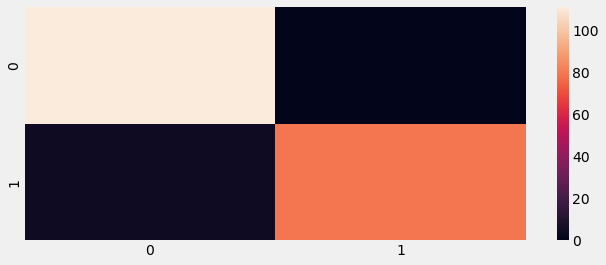

In [70]:
sns.heatmap(cf)

In [71]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

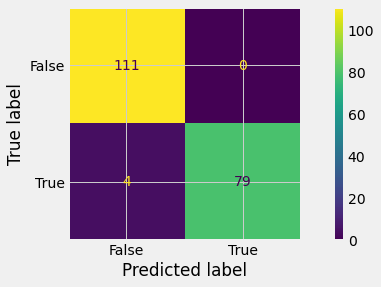

In [72]:
cm_display.plot()
plt.show()

In [73]:

F1_score = metrics.f1_score(y_test2, y_pred)

In [74]:
F1_score

0.9753086419753086

In [75]:
clas_rep = metrics.classification_report(y_test2, y_pred)

In [76]:
print(clas_rep)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       111
           1       1.00      0.95      0.98        83

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [177]:
sentiment_label = df["Reasons for Hesitation"].factorize()



In [189]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
covid = dataset['Reasons for Hesitation'].values
tokenizer = Tokenizer(num_words=5000)
encoded_docs = tokenizer.texts_to_sequences(covid)
padded_sequence = pad_sequences(encoded_docs, maxlen=5000)

In [1]:
text = input("Enter the text you want to predict")

Enter the text you want to predictgrwa


In [2]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=661)
    prediction = tr.predict(tw)
    #prediction = int(tr.predict(tw).round().item())
    if prediction == 0:
        return 'Negative. Not like to take the vaccine'
    else:
        return 'Positive. Likey to take the vaccine'
    #print("Predicted label: ", sentiment_label[1][prediction])



In [3]:
print(text)
predict_sentiment(text)

grwa


NameError: name 'tokenizer' is not defined

In [188]:
df['Reasons for Hesitation'][df['Reasons for Hesitation_sent'] == 'positive']

86              rumors infertility sure long term effects
87              rumors infertility sure long term effects
88              rumors infertility sure long term effects
89              rumors infertility sure long term effects
90              rumors infertility sure long term effects
                              ...                        
1631                                      effects intense
1654    vaccine corona dont want vaccine working coupl...
1655    vaccine corona dont want vaccine working coupl...
1668    People died direct relation vaccine ingredient...
1669    People died direct relation vaccine ingredient...
Name: Reasons for Hesitation, Length: 300, dtype: object